# Multi-class Classification of Anonymized Datasets

In [1]:
# The whole multi-class classification on target 'marital-status' on the adult dataset under several degrees of k-anonymization
# k = {(1), 3, 7, 11, 15, 19, 23, 27, 31, 35, 100}
# classifiers: Logistic Regression, Linear SVC, Random Forest, Gradient Boosting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

from sklearn import metrics, preprocessing, model_selection
from sklearn.ensemble import GradientBoostingClassifier as GradientBoosting, RandomForestClassifier as RandomForest
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

c:\users\tsarcevic\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# Reading data
def read_data(filepath):
    #filepath = "../data/adult_all.csv"
    dataset = pd.read_csv(filepath, sep=r'\s*,\s*', na_values="*", engine='python', index_col=0)
    return dataset

In [4]:
# Reading anonymized data
def read_anon_data(filename):
    filepath = "../output/marital-status/"
    filepath += filename
    dataset = pd.read_csv(filepath, sep=r'\s*,\s*', na_values="*", engine='python', index_col=False)
    return dataset

In [5]:
# Preprocessing
def number_encode_features(ds):
    result = ds.copy()
    encoders = {}
    for feature in result.columns:
        if result.dtypes[feature] == np.object:
            encoders[feature] = preprocessing.LabelEncoder()
            result[feature] = encoders[feature].fit_transform(result[feature].astype(str))
    return result, encoders

In [6]:
# Scoring
def f1_micro(clf, X, y):
    # cross validation scores on number encoded data
    scores = model_selection.cross_val_score(clf, X, y, cv=10, scoring='f1_micro')
    print("F1 score (number encoded data): %0.2f (+/- %0.2f)" 
          % (scores.mean(), scores.std() * 2))
    return scores.mean()

In [ ]:
# The pipeline
k_values = 15, 19 , 23, 27, 31, 35 #, 100

f1_scores_GB = []
f1_scores_LR = []
f1_scores_LSVC = []
f1_scores_RF = []


for k in k_values:
    # read data
    if k==1:
        dataset = read_data("../data/adult_all.csv")
    else:
        dataset = read_anon_data("anonymized_equal_weights_k_" + str(k) + ".csv")
    
    # preprocess
    dataset_encoded, encoders = number_encode_features(dataset)
    
    # define features and target 'marital-status'
    y = dataset_encoded['marital-status']
    X = dataset_encoded.drop('marital-status', axis=1)
    
    # define classifiers
    clf_GB = GradientBoosting(random_state=0)
    clf_LR = LogisticRegression(random_state=0)
    clf_LSVC = LinearSVC(random_state=0)
    clf_RF = RandomForest(random_state=0)
    
    # scoring
    f1_scores_GB.append(f1_micro(clf_GB, X, y))
    f1_scores_LR.append(f1_micro(clf_LR, X, y))
    f1_scores_LSVC.append(f1_micro(clf_LSVC, X, y))
    f1_scores_RF.append(f1_micro(clf_RF, X, y))

F1 score (number encoded data): 0.78 (+/- 0.06)
F1 score (number encoded data): 0.68 (+/- 0.05)
F1 score (number encoded data): 0.48 (+/- 0.27)
F1 score (number encoded data): 0.69 (+/- 0.09)


In [12]:
# Visualize
def plot_results():
    fig = plt.figure(figsize=(14.56,9))
    ax = fig.add_subplot(2,2,1)
    ax.set_title('Logistic Regression')

    plt.plot(k_values, f1_scores_LR, marker='o')
    plt.ylabel('f1 score')
    plt.xlabel('k')

    ax = fig.add_subplot(2,2,2)
    ax.set_title('Linear SVC')

    plt.plot(k_values, f1_scores_LSVC, marker='o')
    plt.ylabel('f1 score')
    plt.xlabel('k')

    ax = fig.add_subplot(2,2,3)
    ax.set_title('Random Forest')

    plt.plot(k_values, f1_scores_RF, marker='o')
    plt.ylabel('f1 score')
    plt.xlabel('k')

    ax = fig.add_subplot(2,2,4)
    ax.set_title('Gradient Boosting')

    plt.plot(k_values, f1_scores_GB, marker='o')
    plt.ylabel('f1 score')
    plt.xlabel('k')

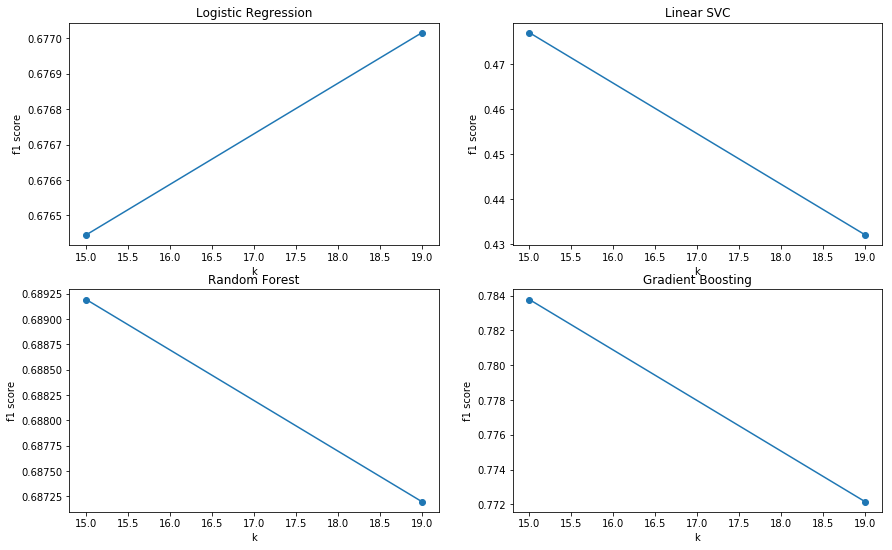

In [13]:
plot_results()